In [4]:
!curl -O https://lodmedia.hb.bizmrg.com/case_files/1128664/train_dataset_cold_start_train.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 4270M  100 4270M    0     0  17.3M      0  0:04:06  0:04:06 --:--:-- 17.6M


In [5]:
!unzip -d ./dataset/ ./train_dataset_cold_start_train.zip

Archive:  ./train_dataset_cold_start_train.zip
  inflating: ./dataset/logs_df_2024-08-05.parquet  
  inflating: ./dataset/logs_df_2024-08-06.parquet  
  inflating: ./dataset/video_stat.parquet  
  inflating: ./dataset/Состав датасета.docx  


In [6]:
%%capture
!pip install pyarrow fastparquet

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
video_df = pd.read_parquet('dataset/video_stat.parquet')

In [3]:
video_df.head()

,video_id,v_pub_datetime,v_total_comments,v_year_views,v_month_views,v_week_views,v_day_views,v_likes,v_dislikes,v_duration,...,v_category_popularity_percent_7_days,v_category_popularity_percent_30_days,v_long_views_1_days,v_long_views_7_days,v_long_views_30_days,row_number,title,description,category_id,author_id
0,973f24c0-15b2-434f-8740-4e2726f79c30,2024-06-15 22:58:03+03:00,0,556,2,0,0,0,0,7.733,...,1.656386,1.616750,0,0,0,1,пережила свой яд,,Мультфильмы,79276150-fdaf-4626-9452-6f1ad975741d
1,1a3f527c-44b2-4f7e-9641-26f078edbf2e,2021-04-18 17:27:42+03:00,0,109,2,1,0,0,0,379.000,...,5.570802,5.649635,0,0,0,1,"🎓Знаете ли Вы, что ؟ Интересные факты ! # ...","🎓Знаете ли Вы, что ? Интересные факты ! # 2🎓...",Развлечения,16278647-5912-48af-a071-582dcfd0e354
2,2f563d09-45ef-4e27-8da0-daa74235a2e7,2022-11-17 16:36:43+03:00,0,163,2,2,0,0,0,1020.767,...,0.342614,0.285310,0,0,0,1,"ЗИМНЯЯ, ТЕПЛАЯ ШЛЯПА крючком. Как связать поля...",Шляпа связана из пряжи NAKO Sport Wool в 100гр...,Хобби,9afa94aa-c2a6-43fc-a0d1-175eaf7fa194
3,154fac0e-1794-4406-afa0-61f688e3a764,2010-01-01 00:00:01+03:00,0,10657,5227,1300,202,24,0,42.025,...,0.418336,0.513562,186,1162,4550,1,найк,найк дрессура,Животные,4af9b043-40f4-4288-85c6-192612dca35b
4,470b4e3e-e06d-4370-80dc-34d6a78b22db,2023-11-29 16:49:46+03:00,0,154,45,13,1,0,0,695.647,...,9.310358,9.290497,0,8,18,1,SHACMAN. Шакман замена двухрядного подшипника ...,,Разное,841e6bd8-0015-4502-a3e9-aaa07112a585


In [4]:
def plot_corr_matrix(df):
  f = plt.figure(figsize=(19, 15))
  plt.matshow(df.corr(), fignum=f.number)
  plt.xticks(range(df.shape[1]), df.columns, fontsize=14, rotation=45)
  plt.yticks(range(df.shape[1]), df.columns, fontsize=14)
  cb = plt.colorbar()
  cb.ax.tick_params(labelsize=14)
  plt.title('Correlation Matrix', fontsize=16)

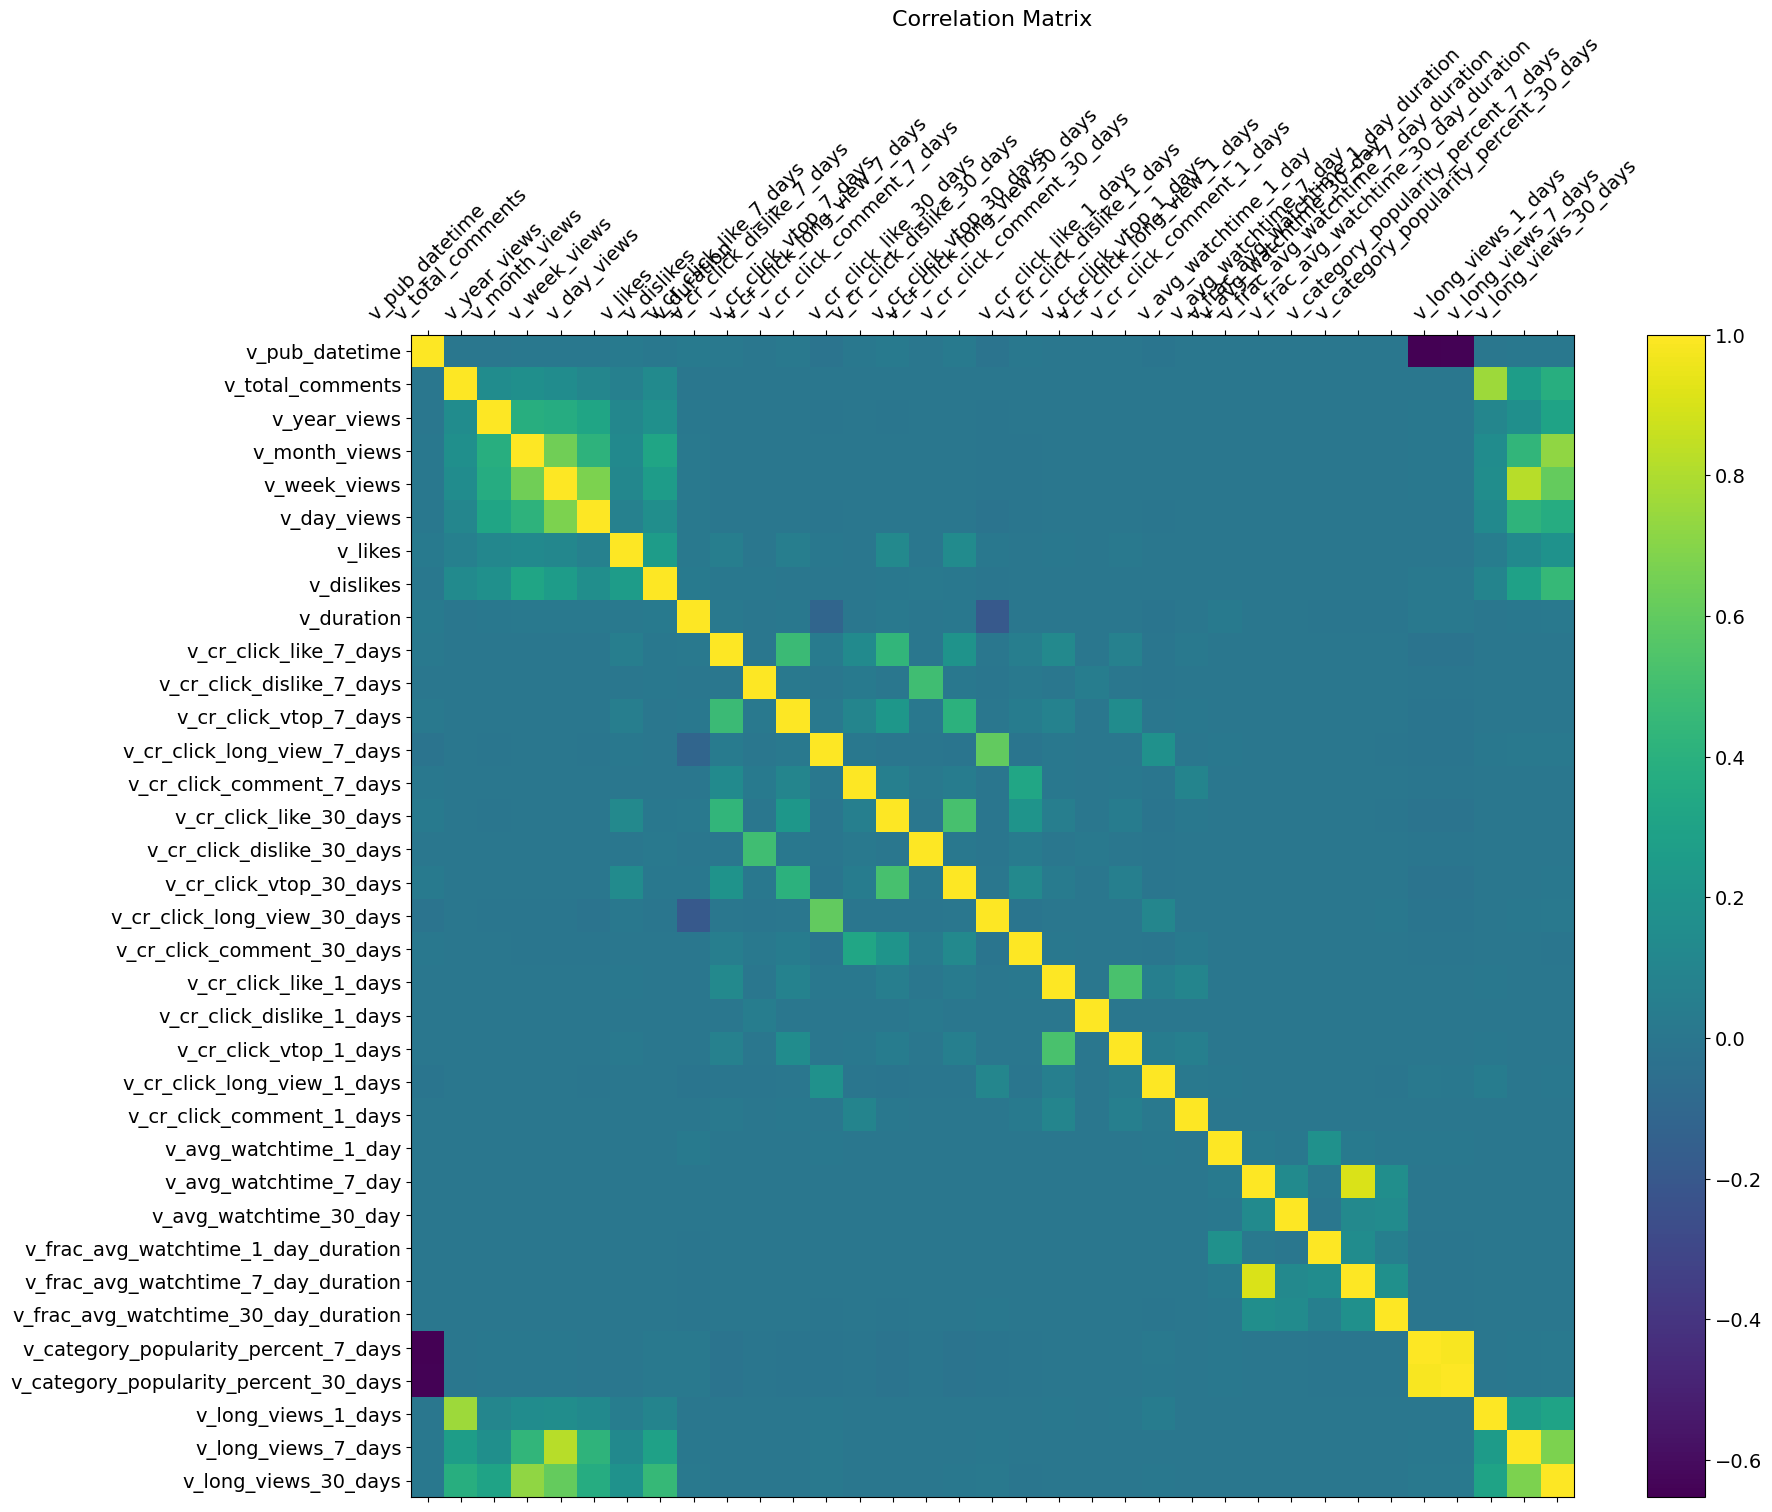

In [5]:
corr_columns=['v_pub_datetime', 'v_total_comments', 'v_year_views',
              'v_month_views', 'v_week_views', 'v_day_views', 'v_likes', 'v_dislikes',
              'v_duration', 'v_cr_click_like_7_days', 'v_cr_click_dislike_7_days',
              'v_cr_click_vtop_7_days', 'v_cr_click_long_view_7_days',
              'v_cr_click_comment_7_days', 'v_cr_click_like_30_days',
              'v_cr_click_dislike_30_days', 'v_cr_click_vtop_30_days',
              'v_cr_click_long_view_30_days', 'v_cr_click_comment_30_days',
              'v_cr_click_like_1_days', 'v_cr_click_dislike_1_days',
              'v_cr_click_vtop_1_days', 'v_cr_click_long_view_1_days',
              'v_cr_click_comment_1_days',
              'v_avg_watchtime_1_day', 'v_avg_watchtime_7_day',
              'v_avg_watchtime_30_day', 'v_frac_avg_watchtime_1_day_duration',
              'v_frac_avg_watchtime_7_day_duration',
              'v_frac_avg_watchtime_30_day_duration',
              'v_category_popularity_percent_7_days',
              'v_category_popularity_percent_30_days', 'v_long_views_1_days',
              'v_long_views_7_days', 'v_long_views_30_days']

plot_corr_matrix(video_df[corr_columns])

In [9]:
video_df.describe()

/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:49: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:49: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:49: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


,v_total_comments,v_year_views,v_month_views,v_week_views,v_day_views,v_likes,v_dislikes,v_duration,v_cr_click_like_7_days,v_cr_click_dislike_7_days,...,v_avg_watchtime_30_day,v_frac_avg_watchtime_1_day_duration,v_frac_avg_watchtime_7_day_duration,v_frac_avg_watchtime_30_day_duration,v_category_popularity_percent_7_days,v_category_popularity_percent_30_days,v_long_views_1_days,v_long_views_7_days,v_long_views_30_days,row_number
count,1.555687e+06,1.555687e+06,1.555687e+06,1.555687e+06,1.555687e+06,1.555687e+06,1.555687e+06,1.555687e+06,1.555687e+06,1.555687e+06,...,1.555687e+06,1.555687e+06,1.555687e+06,1.555687e+06,1.555687e+06,1.555687e+06,1.555687e+06,1.555687e+06,1.555687e+06,1555687.0
mean,2.786473e+00,3.075235e+03,4.403570e+02,1.411275e+02,2.598847e+01,1.055376e+01,1.464433e-01,1.126346e+03,3.198704e-01,9.344966e-03,...,3.908074e+02,NaN,NaN,NaN,5.240465e+00,5.350623e+00,6.209565e-01,5.070136e+01,1.708053e+02,1.0
std,8.666996e+02,1.670595e+05,1.552218e+04,4.268034e+03,7.278497e+02,1.287146e+02,4.044920e+00,3.097042e+03,2.997889e+00,5.208259e-01,...,4.457580e+04,NaN,NaN,NaN,7.051096e+00,7.146176e+00,6.224143e+01,1.741756e+03,5.098260e+03,0.0
min,0.000000e+00,1.010000e+02,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,-1.000000e+00,-inf,-inf,-inf,7.255364e-06,1.196984e-05,0.000000e+00,0.000000e+00,0.000000e+00,1.0
25%,0.000000e+00,1.360000e+02,7.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.439180e+02,0.000000e+00,0.000000e+00,...,5.266667e+01,0.000000e+00,5.758877e-02,2.270814e-01,1.407475e+00,1.512180e+00,0.000000e+00,0.000000e+00,2.000000e+00,1.0
50%,0.000000e+00,2.290000e+02,2.500000e+01,6.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,3.810000e+02,0.000000e+00,0.000000e+00,...,1.252778e+02,2.214999e-02,3.323480e-01,4.044719e-01,3.497065e+00,3.364147e+00,0.000000e+00,2.000000e+00,9.000000e+00,1.0
75%,0.000000e+00,5.880000e+02,9.600000e+01,2.700000e+01,4.000000e+00,1.000000e+00,0.000000e+00,1.259834e+03,0.000000e+00,0.000000e+00,...,3.226000e+02,4.564220e-01,5.542662e-01,5.756965e-01,7.811486e+00,8.047285e+00,0.000000e+00,1.000000e+01,3.800000e+01,1.0
max,1.072279e+06,1.752804e+08,5.261740e+06,2.115690e+06,3.026050e+05,1.047200e+04,3.254000e+03,2.147484e+06,2.000000e+02,1.000000e+02,...,5.359830e+07,inf,inf,inf,9.959975e+01,9.954730e+01,5.917000e+04,1.074069e+06,2.019733e+06,1.0


In [10]:
(video_df.loc[:, 'v_cr_click_like_30_days'] == 100).sum()

113

In [11]:
(video_df.loc[:, 'v_cr_click_like_7_days'] == 100).sum()

685

In [20]:
del video_df

In [ ]:
logs_df = pd.read_parquet('dataset/logs_df_2024-08-06.parquet')

In [ ]:
logs_df.head()

In [ ]:
logs_2_df = pd.read_parquet('dataset/logs_df_2024-08-05.parquet')

In [ ]:
logs_2_df.head()